# 4.	Functions. Higher-order function. Function Call Stack.

## Functions

"a function is a callable unit of software logic that has a well-defined interface and behavior and can be invoked multiple times."

A pure function is a function that always returns the same result if the same arguments are passed.

In [1]:
def prod(a, b): 
	return a * b

prod(2, 3)

6

#### Problem:

Suggest a function that is not a pure function.

Type annotation - makes it easier to understand, but is not checked (so errors may occur during execution):

In [1]:
def prod(a: int, b: int) -> int: 
	return a * b

print('Multiplication:')
print("Ints:", prod(2, 3))
print("Floats", prod(2.1, 3.1))
print("String/Int:", prod('abc', 3))

def div(a: int, b: int) -> int: 
	return a / b

print('Division:')
print("Ints:", div(2, 3))
print("Floats:", div(2.1, 3.1))
print("String/Int:", div('abc', 3))

Multiplication:
Ints: 6
Floats 6.510000000000001
String/Int: abcabcabc
Division:
Ints: 0.6666666666666666
Floats: 0.6774193548387097


TypeError: unsupported operand type(s) for /: 'str' and 'int'

But you can check the type of the value inside the function (if necessary), then you can prevent the program from crashing.

Type checking - is done either with assert, which is suitable for the debugging stage, or with exceptions ("it's easier to ask forgiveness than permission"). In the latter case, you can handle errors.

In [18]:
def prod(a: int, b: int) -> int: 
    try:
        return a * b
    except (AttributeError, TypeError):
        return None
        #raise AssertionError('Input variables should be ints')

print('multiplication:')
print("Ints:", prod(2, 3))
print("Floats:", prod(2.1, 3.1))
print("String/Int:", prod('abc', 3))
print("Strings:", prod('abc', 'def'))

multiplication:
Ints: 6
Floats: 6.510000000000001
String/Int: abcabcabc
Strings: None


In [16]:
def div(a: int, b: int) -> int: 
    for obj in (a, b):
        assert isinstance(obj, int), 'Argument of wrong type!'
    return a / b

print('division:')
print("Ints:", div(2, 3))
print("Floats:", div(2.1, 3.1))
print("String/Int:", div('abc', 3))

division:
Ints: 0.6666666666666666


AssertionError: Argument of wrong type!

## Passing arguments to a function: by value and by reference

### Mutable:
    list
    set
    dict

A mutable object is passed to functions by reference and can be modified from functions.

In [23]:
def foo(my_list):
    my_list[0] = 42
    print(f'{id(my_list)=}')

lst = [1, 2, 3]
print(f'{id(lst)=}')
foo(lst)
print(lst)

id(lst)=139800717061184
id(my_list)=139800717061184
[42, 2, 3]


ИChanging an object inside a function will affect the global object,
but assigning a new value to the passed parameter will result in the creation of a local variable. Also, accessing a global variable to assign a new value will not work.

You can see that the object is different after the change by checking its id.

In [36]:
lst = [1, 2, 3]

def foo(my_list):
    print('inside:')
    print(f'{id(my_list)=}')
    my_list[1] = 5
    my_list = [3, 4, 5]
    lst = 4
    print(f'{id(my_list)=}')
    print(f'{id(lst)=}')


print(f'{id(lst)=}')
foo(lst)
print('Outside again:')
print(f'{id(lst)=}')
print(lst)

id(lst)=139800362514560
inside:
id(my_list)=139800362514560
id(my_list)=139800362924864
id(lst)=10869512
Outside again:
id(lst)=139800362514560
[1, 5, 3]


To use a global variable inside a function, when it is declared after the function, and when it needs to be changed, the keyword "global" is used:

In [35]:
lst = [1, 2, 3]

def foo(my_list):
    print('inside:')
    print(f'{id(my_list)=}')
    my_list[1] = 5
    my_list = [3, 4, 5]
    global lst
    lst = 4
    print(f'{id(my_list)=}')
    print(f'{id(lst)=}')


print(f'{id(lst)=}')
foo(lst)
print('Outside again:')
print(f'{id(lst)=}')
print(lst)

id(lst)=139800362725760
inside:
id(my_list)=139800362725760
id(my_list)=139800717041728
id(lst)=10869512
Outside again:
id(lst)=10869512
4


### Immutable
    numerical data (int, float, complex)
    symbol strings (str)
    tuples 

Immutable objects are passed to functions by value (as a copy)

In [18]:
def foo(par):
    par = 3
    return par

# immutable parameter
par = 5
print ('immutable is ', foo(par))
print ('par is ', par)

immutable is  3
par is  5


#### Passing a function as an argument to another function

Functions can be passed to other functions as parameters.

https://www.geeksforgeeks.org/higher-order-functions-in-python/

In [4]:
def shout(text):
    return text.upper()

def greet(func):
    greeting = func("Hello")
    print(greeting)

greet(shout)

HELLO


In [11]:
def say_hello(name):
    return (f'Hello, {name}')

def say_hi(name):
    return (f'Hi, {name}')

def hi_bob(greeter_func):
    return greeter_func('Bob')

print(hi_bob(say_hi))
print(hi_bob(say_hello))

Hi, Bob
Hello, Bob


## Higher-order function (HOF)


Higher-order functions are functions that take other functions as inputs or return functions as outputs.

Examples from Python:
sort, sorted, map, filter 



#### sort()
By default, sorting is performed lexigraphically - that is, as in a spelling dictionary, first by the first letter or parameter, then by the second.

Sorting can be performed by a separate rule specified in the key parameter.

.sort(key=key, reverse=False) applies to strings:

In [24]:
def srt1(x): 
    return x[1] 


l=[['A',5],['C',3],['B',1]] 
l.sort() 
print('Sorted by first element:', l) 

l.sort(key=srt1) 
print('Sorted by second element:', l)

Sorted by first element: [['A', 5], ['B', 1], ['C', 3]]
Sorted by second element: [['B', 1], ['C', 3], ['A', 5]]


### sorted()

Any iterable can be sorted using the sorted() function, which returns a list of sorted objects:

sorted(iterable, key=key, reverse=reverse)

In [2]:
# https://www.w3schools.com/python/ref_func_sorted.asp

a = ("h", "b", "a", "c", "f", "d", "e", "g")
x = sorted(a)
print(x)

a = ("h", "b", "a", "c", "f", "d", "e", "g")
x = sorted(a, reverse=True)
print(x)

a = ("Jenifer", "Sally", "Jane")
x = sorted(a, key=len)
print(x)

def myfunc(n):
  return abs(10-n)

a = (5, 3, 1, 11, 2, 12, 17)
x = sorted(a, key=myfunc)
print(x)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']
['Jane', 'Sally', 'Jenifer']
[11, 12, 5, 3, 17, 2, 1]


#### map()

Apply function to every item of iterable and return a map object, that can be converted into a list of the results.


https://www.geeksforgeeks.org/python-map-function/

In [3]:
# Return double of n
def double(n):
    return n + n

# We double all numbers using map()
numbers = (1, 2, 3, 4)
result = map(double, numbers)
print(list(result))

[2, 4, 6, 8]


### filter()

Applies a function to all elements of a sequence and returns an iterator with those objects for which the function returned True.
Returns an object that can be converted to a list.

In [6]:
# Фильтр нечетных чисел

def filter_odd_num(in_num):
    if(in_num % 2) == 0:
        return True
    else:
        return False

numbers = [1, 2, 4, 5, 7, 8, 10, 11]

even_numbers = list(filter(filter_odd_num, numbers))
print(even_numbers)

[2, 4, 8, 10]


#### Lambda Functions (Anonymous) in Python

Notation like a

In [17]:
lambda x: x + 1

<function __main__.<lambda>(x)>

is equeal to

In [19]:
def func(x):
    return x+1

Exapmle:

In [21]:
func = lambda x, y: x + y
print(func(1, 2))
print(func('a', 'b'))

3
ab


Declaration and immediate called:

In [22]:
(lambda x, y: x + y)(1, 2)

3

Properties:
* Almost indistinguishable from a function with a single return line
* Contains only one line of expression (which evaluates and returns)
* Does not support type annotation
* Can be immediately called
* Cannot contain declarations
* No unique identifier for access
* Can be named and called by name
* Lambda functions are most appropriately used in high-level functions (sort, sorted, map, filter, min, max)

#### Application of lambda function

key in sort finctions:

In [25]:
l=[['A',5],['C',3],['B',1]] 
l.sort() 
print('Sorted by first element:', l) 
[['A',5],['B',1],['C',3]] 
l.sort(key=lambda x: x[1]) 
print('Sorted by second element:', l)

Sorted by first element: [['A', 5], ['B', 1], ['C', 3]]
Sorted by second element: [['B', 1], ['C', 3], ['A', 5]]


In [33]:
l = ["1", "2", "9", "0", "-1", "-2"]
print('Sorted by default:', sorted(l))
print('Sorted by x:', sorted(l, key=lambda x: int(x)))
print('Sorted by x^2:', sorted(l, key=lambda x: int(x)**2))

Sorted by default: ['-1', '-2', '0', '1', '2', '9']
Sorted by x: ['-2', '-1', '0', '1', '2', '9']
Sorted by x^2: ['0', '1', '-1', '2', '-2', '9']


In map():

In [38]:
# We double all numbers using map()
numbers = (1, 2, 3, 4)
result = map(lambda x: x + x, numbers)
print(list(result))

[2, 4, 6, 8]


### Alternative to functions map()/filter() - List Comprehension

In [35]:
lst = ['cat', 'dog', 'cow']

a = list(map(lambda x: x.capitalize(), lst))
print(a)

b = [x.capitalize() for x in lst]
print(b)

['Cat', 'Dog', 'Cow']
['Cat', 'Dog', 'Cow']


In [37]:
even = lambda x: x%2 == 0 
a = list(filter(even, range(11)))
print(a)

b = [x for x in range(11) if x%2 == 0]
print(b)

[0, 2, 4, 6, 8, 10]
[0, 2, 4, 6, 8, 10]


## Recursive functions

Advantages:
* Sometimes recursion reduces the number of lines of code.
* Code looks simple.
* If we know the base case, then it is easier to use in a function.

Disadvantages:

* If the function is not implemented properly, then it will never stop.
* Understanding recursion is more confusing than loops.
* Limitation of 3000 calls (Python) (stack depth, see below)

In [39]:
import sys
sys.getrecursionlimit()

3000

For example, direct and reverse recursive counters (in one case, printing occurs before the function call, in the other after):

PS How would you implement a regular counter like this?

In [50]:
def countup(n):
    if n > 0:
        countup(n - 1)
        print(n)

countup(5)

1
2
3
4
5


In [51]:
def countdown(n):
    if n > 0:
        print (n)
        countdown(n-1)

countdown(5)

5
4
3
2
1


#### Calculating factorial


Iterative function:

In [46]:
def factorial_iterative(n):
    if n < 0:
        print("n must not be negative")
        return
    factorial = 1
    for i in range (1, n + 1):
        factorial = factorial*i
    return factorial

a = 10

factorial_iterative(a)

3628800

Recursive function:

In [70]:
def factorial_recursive(n):
    if n < 0:
        print("n must not be negative")
        return
    if n == 1:
        return n
    else:
        return n*factorial_recursive(n-1)

factorial_recursive(a)

3628800

#### Fibonacci Series

Iterative function:

In [62]:
def fibonacci_iterative(n): 
    """ Returns Fibonacci Number at nth position using loop""" 
    if n == 0: 
        return 0 
    if n == 1: 
        return 1 
    i1 = 0 
    i2 = 1 
    num = 1 
    for x in range(1, n): 
        num = i1 + i2 
        i1 = i2 
        i2 = num 
    return num 

a = 10

for i in range(a): 
    print(fibonacci_iterative(i), end=" ") 

0 1 1 2 3 5 8 13 21 34 

Recursive function:

In [63]:
def fibonacci_recursive(n): 
    """ Returns Fibonacci Number at nth position using recursion""" 
    if n == 0: 
        return 0 
    elif n == 1: 
        return 1 
    else: 
        return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2) 
        
for i in range(a): 
    print(fibonacci_recursive(i), end=" ")

0 1 1 2 3 5 8 13 21 34 

#### Calculating the execution time of a function

In [67]:
import time
b = 30

start_time = time.time()
factorial_iterative(b)
print(f"iterative: {(time.time() - start_time):.9f} seconds")

start_time = time.time()
factorial_recursive(b)
print(f"ecursive: {(time.time() - start_time):.9f} seconds")


iterative: 0.000383615 seconds
ecursive: 0.217459679 seconds


In [65]:
import time
c = 30

start_time = time.time()
fibonacci_iterative(c)
print(f"{(time.time() - start_time):.9f} seconds")

start_time = time.time()
fibonacci_recursive(c)
print(f"{(time.time() - start_time):.9f} seconds")


0.000077963 seconds
0.212379932 seconds


Conclusion - usually iterative call is faster (and always easier to debug).

But sometimes recursive notation is more clear/succinct, and also does not require introducing a counter variable.

"Recursive method calls in Python cause a new stack frame allocation for every call. If you can iterate over a list instead then you avoid this allocation and will see a tremendous speed increase."

PS In other languages the difference is not so dramatic, for example C++ https://craftofcoding.wordpress.com/2021/02/08/why-python-is-horrible-for-recursion/  

# Function Call Stack

Stack and subroutine calls

* A program consists of functions, functions can call other functions,
* When calling another function, the current function places data on the stack and removes it from there when returning.
* Each function call creates a frame on the stack (at least the return address).
* When executing a nested program, the stack is unrolled in the opposite direction.
* If you want the data to continue to exist after the function has finished, then space for it is allocated not on the stack, but in shared memory.

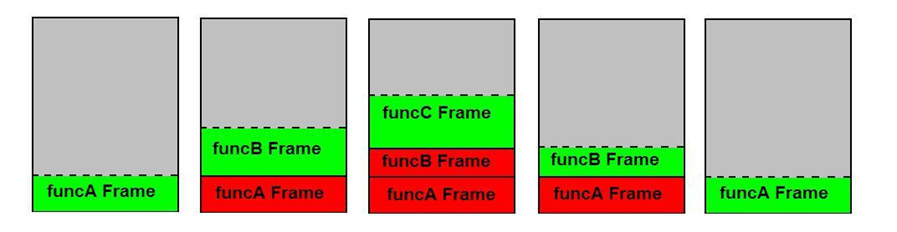

https://stackoverflow.com/questions/23981391/how-exactly-does-the-callstack-work

When calling sequentially, execution starts from the last function called:

In [39]:
def funcA(a):
    print('A')
    
def funcB(a):
    print('B')
    
def funcC(a):
    print('C')

funcA(funcB(funcC(0)))

C
B
A


## Architecture of microprocessors

### Stack architecture


https://upscfever.com/upsc-fever/en/gatecse/en-gatecse-chp159.html - Computer Organization and Architecture (Stack Organization) - UPSC FEVER

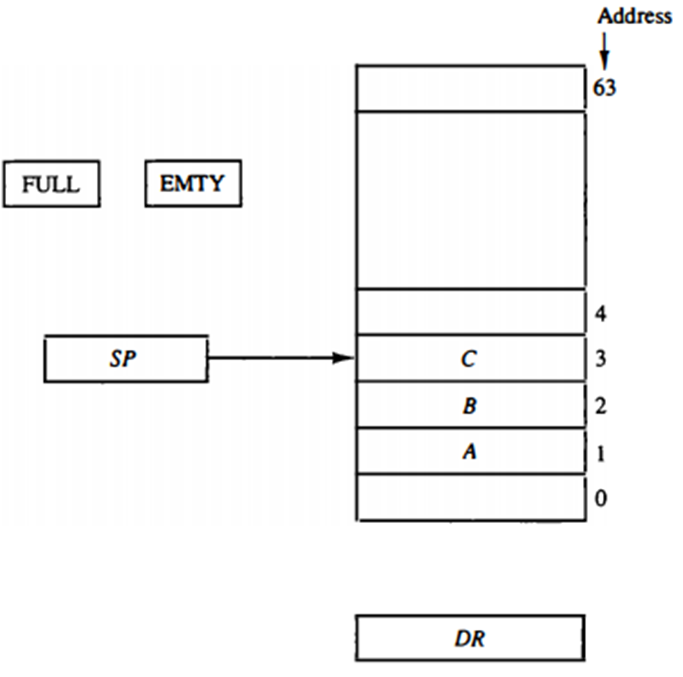

#### Register architecture using the example of the Intel 8080 processor


http://mc-plc.ru/mps/sistema-komand-mikroprocessora-intel8080.htm

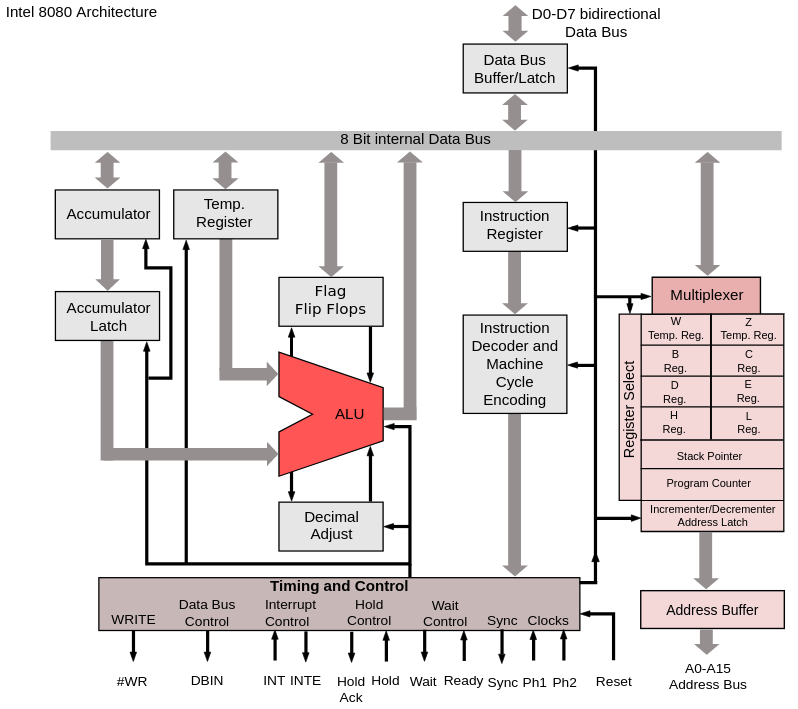


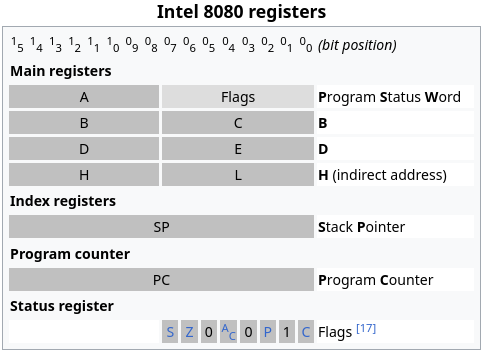

Flags: carry (CY), zero (Z), sign (S), overflow (O), parity (P), and auxiliary carry (AC)


https://en.wikipedia.org/wiki/Intel_8080

The instruction set of the i8080 microprocessor

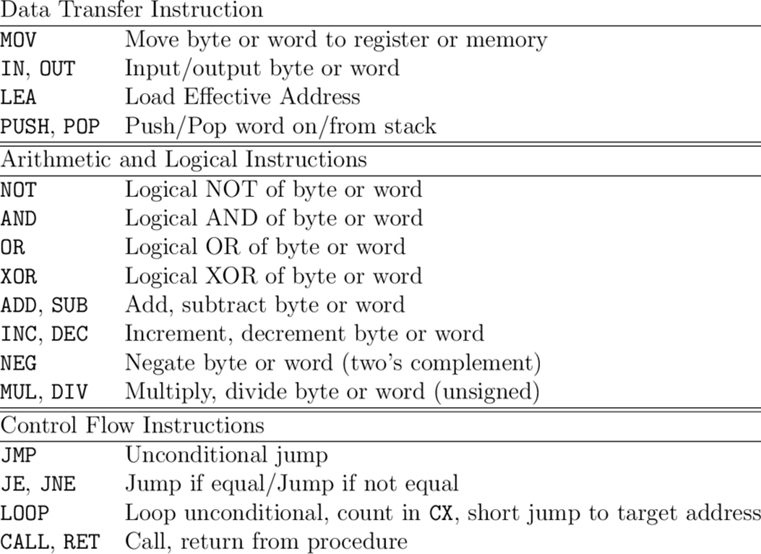

[Stamp, Mark & Mungale, M. (2012). Software similarity and metamorphic detection.]


#### Architecture of an ARM (an acronym for Advanced RISC Machines and originally Acorn RISC Machine) processor:

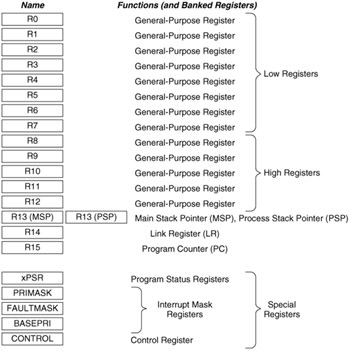

https://www.ques10.com/p/31744/explain-in-detail-about-the-cortex-m3-register-s-1/
https://www.espacetechnologue.com/wp-content/uploads/2020/04/CH1_-architectureARM.pdf

#### What is Subroutine in Microprocessor?

https://www.eeeguide.com/what-is-subroutine-in-microprocessor/

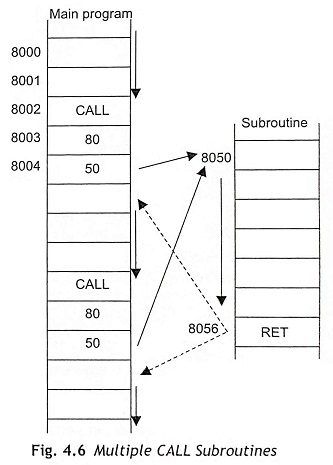

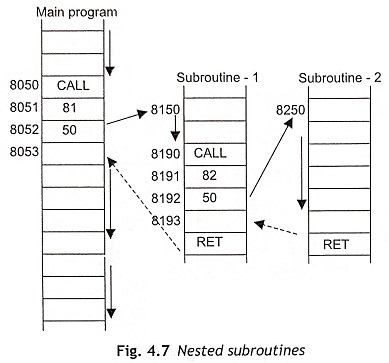





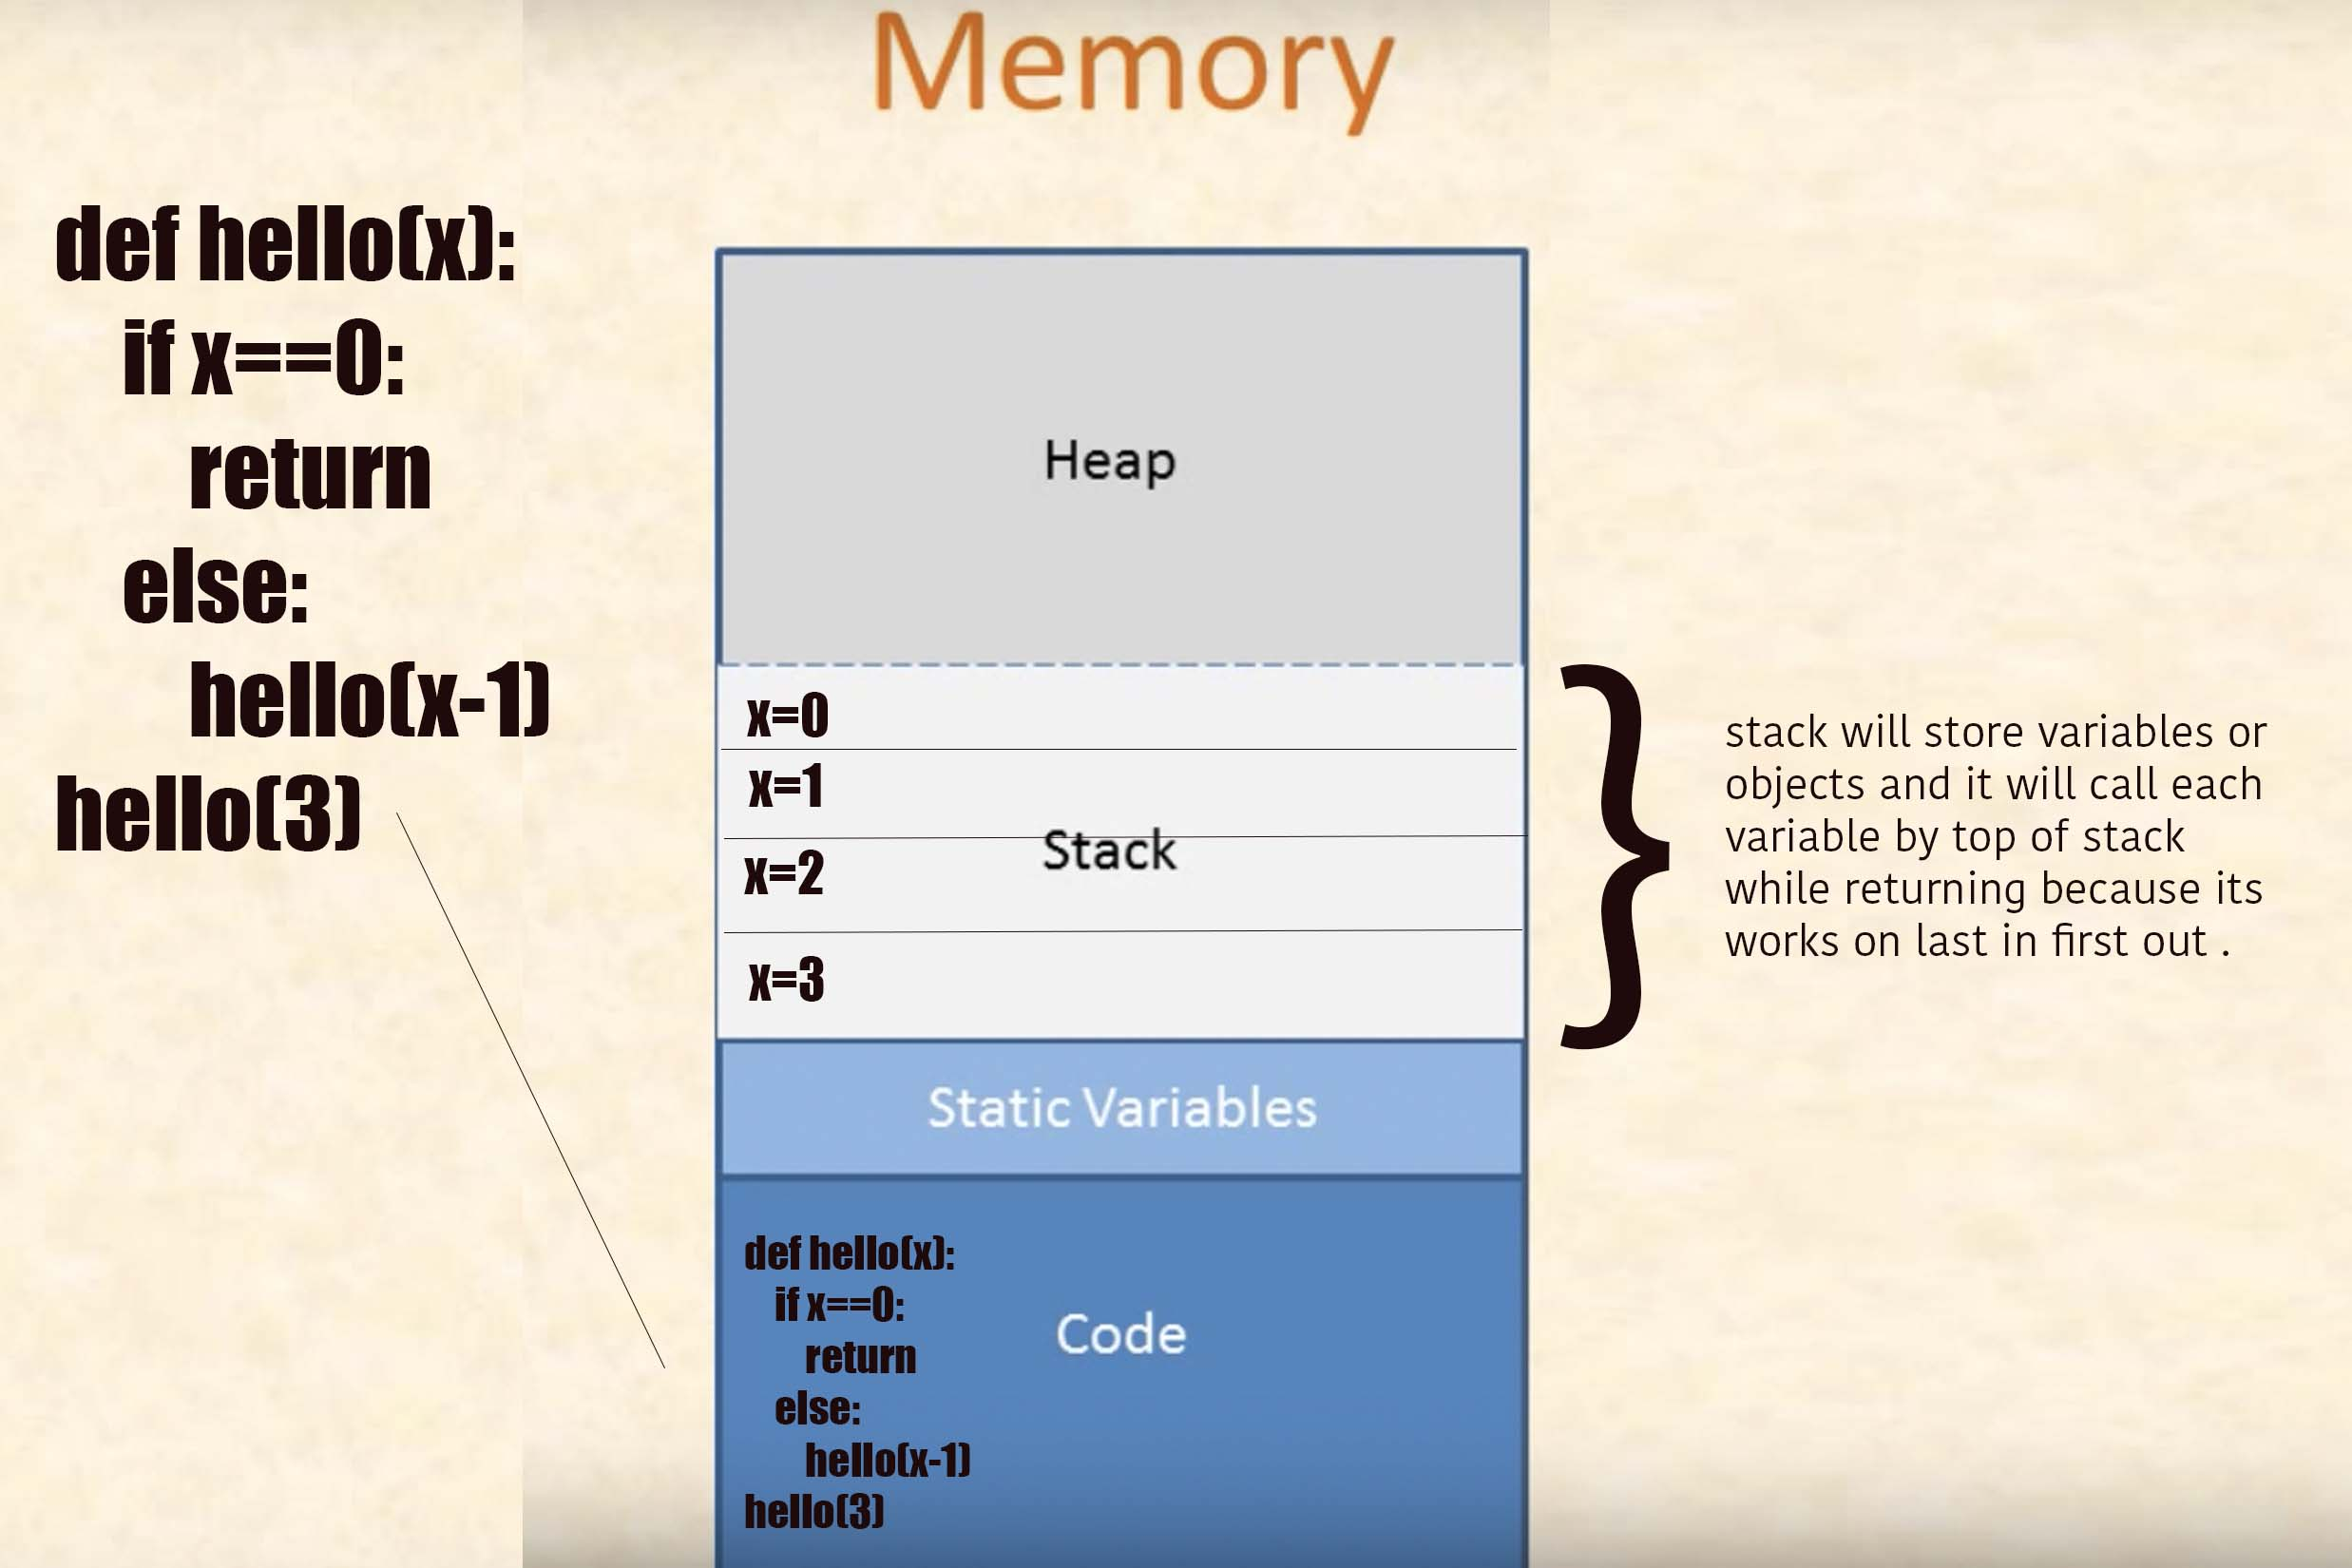

https://stackoverflow.com/questions/556714/how-does-the-stack-work-in-assembly-language



#### Problem

The following instructions are available:

* PUSH X – reads the value from memory address X and pushes it onto the stack.
* POP X – pops the top value from the stack and writes it to memory address X.
* ADD – pops two arguments from the stack, adds them, and pushes the result onto the stack.
* MUL – pops two arguments from the stack, multiplies them, and pushes the result onto the stack.

Write a program that calculates the value

M0 = (M0 + M1) * (M2 + (M1 * M3)) 

using the specified set of commands
(PUSH X, POP X, ADD, MUL)

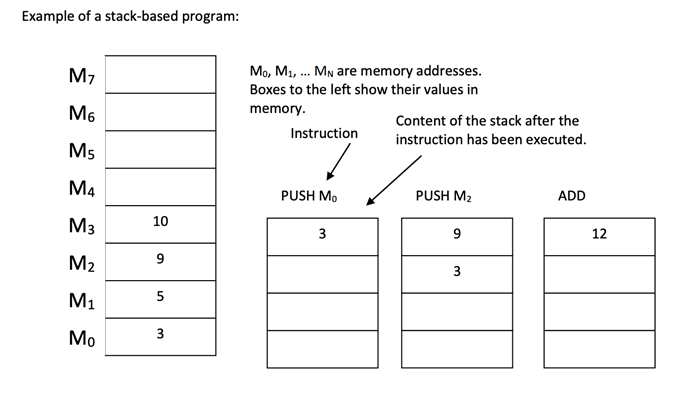

https://www.chegg.com/homework-help/questions-and-answers/stack-based-architecture-processor-don-t-simulator-write-code-using-favorite-text-editor-a-q78010774

#### Architecture of Python Virtual Machine

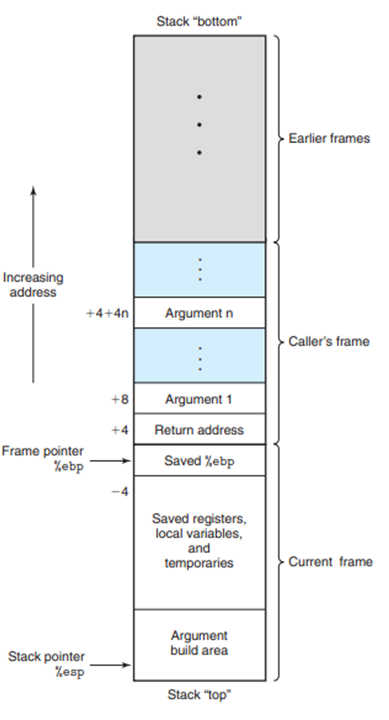

http://jasonleaster.github.io/2016/02/21/architecture-of-python-virtual-machine/ Architecture of Python Virtual Machine


Ways to disassemble Python functions and see the machine code (bytecode):

- dis library https://docs.python.org/3/library/dis.html
- https://godbolt.org/

#### Python bytecode example

* LOAD_CONST takes a constant and pushes its value onto the stack.
* LOAD_FAST takes a variable and pushes a reference to that variable onto the stack.
* BINARY_OP implements binary operators (depending on the value of op). When executed, they remove the top of the stack (TOS) and the second-highest element of the stack (TOS1) from the stack. They perform the operation and push the result back onto the stack.
* RETURN_VALUE returns the result on the top of the stack of the calling function.

In [102]:
# example.py
def square(num): 
    return num * num 

def square(num): 
    return num ** 2

#### Disassembly Python (dis.dis)

https://stackoverflow.com/questions/31989893/how-to-fully-disassemble-python-source
https://digitology.tech/docs/python_3/library/dis.html  

In [103]:
import dis

def myfunc(alist):
    return len(alist)

dis.dis(myfunc)

  4           0 LOAD_GLOBAL              0 (len)
              2 LOAD_FAST                0 (alist)
              4 CALL_FUNCTION            1
              6 RETURN_VALUE


## Problem

Implement conversions as functions:
* temperature Celsius <=> Fahrenheit,
* energy Joules <=> electron volts,
* photon energy (eV) <=> photon wavelength and color/range


### Problem

Write a Gauss function. All constants can be set by default, the function must take the value x.

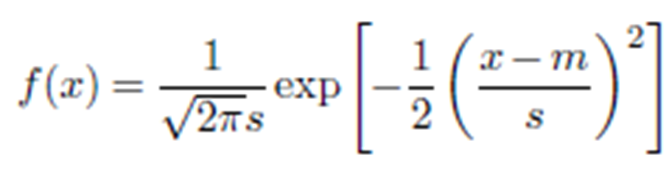



$f(x)=\frac{1}{\sqrt(2\pi) s} exp \left[-\frac{1}{2}\left( \frac{x-m}{s} \right)^2 \right]$

Hints:
```python
from math import sqrt, pi, exp
m = 0
s = 2
x = 1.0
```